# Maman21

## Author - Gal Hindi

### Steps
1. Parsing the input
2. Creating the graphs for the dataset before the changes

In [50]:
# Parse the input file from `.data` to `csv`(.json) format

from typing import List
import pandas as pd
import re

def parse_input(names_file: str, data_file: str) -> pd.DataFrame:
    # Read the names file to get the column names (class is the first column)
    colums: List[str] = ["class"]
    with open(names_file) as f:
        for line in f:
            sre = re.match(r"(?P<colname>[a-zA-Z0-9_\-]+):.*\.", line)
            if sre:
                colums.append(sre.group("colname"))

    options = {"names": colums, "header": None}
    return pd.read_csv(data_file, **options)

names_file = "thyroid_disease\\hypothyroid.names"
data_file = "thyroid_disease\\hypothyroid.data"

parsed_df = parse_input(names_file, data_file)

# Move the class column to the last column
parsed_df_class_column = parsed_df.pop("class")
parsed_df["class"] = parsed_df_class_column

print(parsed_df.columns)
print(parsed_df.dtypes)
print(parsed_df.head())

parsed_df.to_csv('hypothyroid.csv', index=False)

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG',
       'class'],
      dtype='object')
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                   

In [51]:
# Utils to parse the column types

import matplotlib.axes
import matplotlib.pyplot as plt
import math

def parse_column_types(df: pd.DataFrame):
    for col in df.columns:
        column_values = df[col].value_counts()
        if "y" in column_values.keys() or "n" in column_values.keys() or "t" in column_values.keys() or "f" in column_values.keys():
            # "y"/"t" -> 1, "n"/"f" -> 0
            df[col] = df[col].map(lambda x: 1 if x == "y" or x == "t" else (0 if x == "f" or x == "n" else x)).apply(pd.to_numeric, errors='coerce')
        elif "M" in column_values.keys() or "F" in column_values.keys():
            # M(Male) -> 1, F(Female) -> 0
            df[col] = df[col].map(lambda x: 1 if x == "M" else (0 if x == "F" else x)).apply(pd.to_numeric, errors='coerce')
        elif "hypothyroid" in column_values.keys() or "negative" in column_values.keys():
            # hypothyroid -> 1, negative -> 0
            df[col] = df[col].map(lambda x: 1 if x == "hypothyroid" else (0 if x == "negative" else x)).apply(pd.to_numeric, errors='coerce')
        else:
            df[col] = df[col].map(lambda x: pd.to_numeric(x, errors='coerce')).astype("float")

# Functions for plotting the histogram

def plot_histogram(df: pd.DataFrame, column_name: str, ax: matplotlib.axes.Axes):
    # Separate the data based on class
    class_0 = df[df['class'] == 0][column_name]
    class_1 = df[df['class'] == 1][column_name]

    # Histogram for Negative class
    ax.hist(class_0, bins=30, color='blue', alpha=0.7, label=f'Negative - {class_0.dropna().size}')

    # Histogram for Hypothyroid class
    ax.hist(class_1, bins=30, color='red', alpha=0.7, label=f'Hypothyroid - {class_1.dropna().size}')

    ax.legend(prop={'size': 10})
    ax.set_title(column_name)

    missing_count = df[column_name].isna().sum()
    missing_precentage = int(df[column_name].isna().sum() / df[column_name].size * 100)
    ax.text(0, 0.99, f"Missing: {missing_count} ({missing_precentage}%)", fontsize=6, ha='left', va='top', transform=ax.transAxes)


def plot_dataframe(df: pd.DataFrame):
    number_of_rows_needed = math.ceil(df.columns.size / 2)
    fig, axes = plt.subplots(nrows=number_of_rows_needed, ncols=2, figsize=(15, 50))
    plotting_row = 0
    for i, col in enumerate(df.columns):
        if i % 2 == 0:
            plot_histogram(df, col, axes[plotting_row][0])
        else:
            plot_histogram(df, col, axes[plotting_row][1])
            plotting_row += 1

parse_column_types(parsed_df)

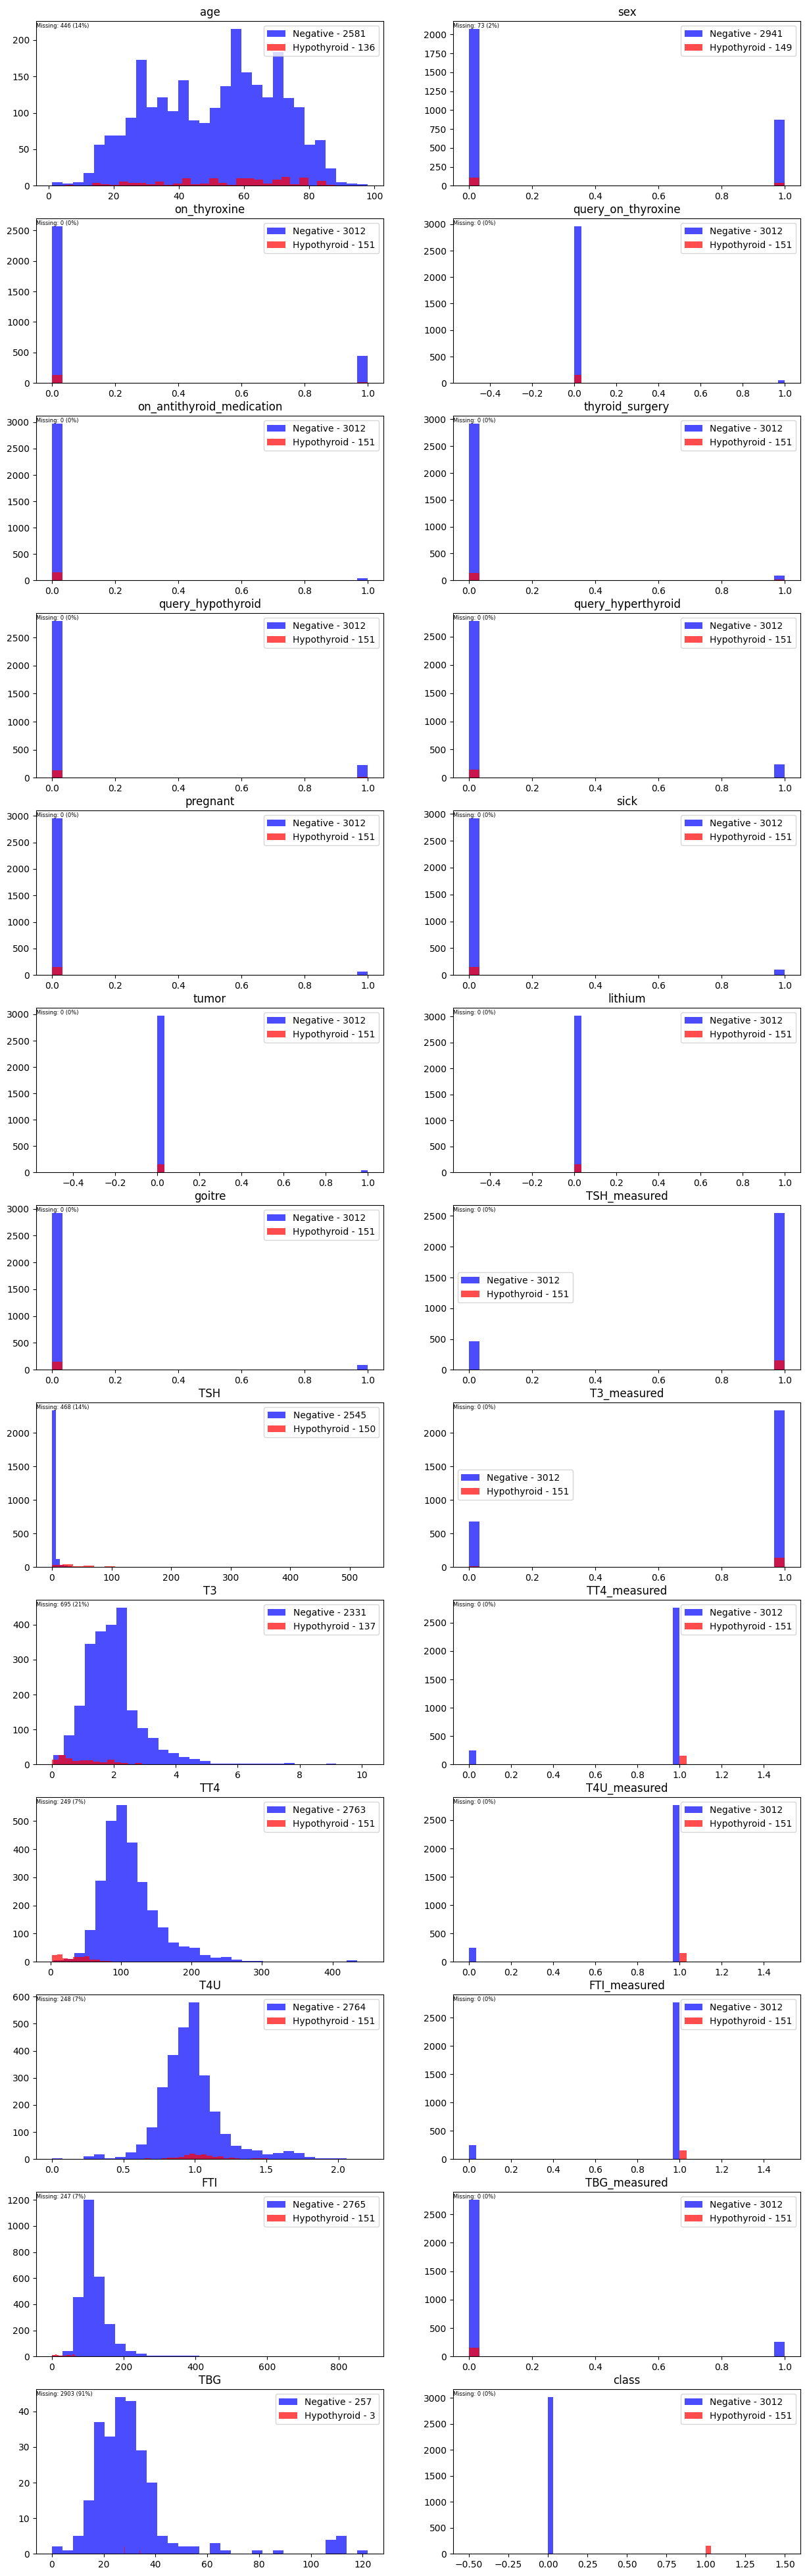

In [52]:
# Plot the histograms

plot_dataframe(parsed_df)

## Cleaning conclusions